In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import BatchNormalization
from keras.regularizers import l2

## Data Loading

In [2]:
df= pd.read_csv(r'C:\Users\SEO01\Desktop\archive\Sales_Data\Liquor_Sales.csv')

C:\Users\SEO01\AppData\Local\Temp\ipykernel_6448\645332662.py:1: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(r'C:\Users\SEO01\Desktop\archive\Sales_Data\Liquor_Sales.csv')


In [3]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S24127700024,02/19/2015,3678,"Smoke Shop, The",1918 SE 14TH ST,DES MOINES,50320,POINT (-93.597011 41.570844),77.0,Polk,...,41783,Uv Blue Raspberry Vodka Mini,6,500,4.89,7.34,2,14.68,1.0,0.26
1,S15066200002,10/10/2013,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77.0,Polk,...,904969,Sabe Premiom Sake Double Barrel,6,750,14.99,22.49,6,134.94,4.5,1.19
2,S19323500030,06/03/2014,2607,Hy-Vee Wine and Spirits / Shenandoah,520 SO FREMONT,SHENANDOAH,51601,POINT (-95.385111 40.761736),73.0,Page,...,45277,Paramount White Rum,12,1000,4.34,6.51,12,78.12,12.0,3.17
3,S23334500013,01/06/2015,4810,Kum & Go #518 / Ankeny,3603 NE OTTERVIEW CIRCLE,ANKENY,50021,POINT (-93.572458 41.760989),77.0,Polk,...,43121,Bacardi Superior Rum Mini,12,500,5.54,8.31,1,8.31,0.5,0.13
4,S09742200010,12/27/2012,4025,Karam Kaur Khasriya Llc,702 13TH ST,BELLE PLAINE,52208,POINT (-92.277759 41.897052),6.0,Benton,...,11298,Crown Royal Canadian Whisky,6,1750,31.00,46.49,2,92.98,3.5,0.92


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666763 entries, 0 to 19666762
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            object 
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Lit

## Distribution of Numerical Variables Through Histogram

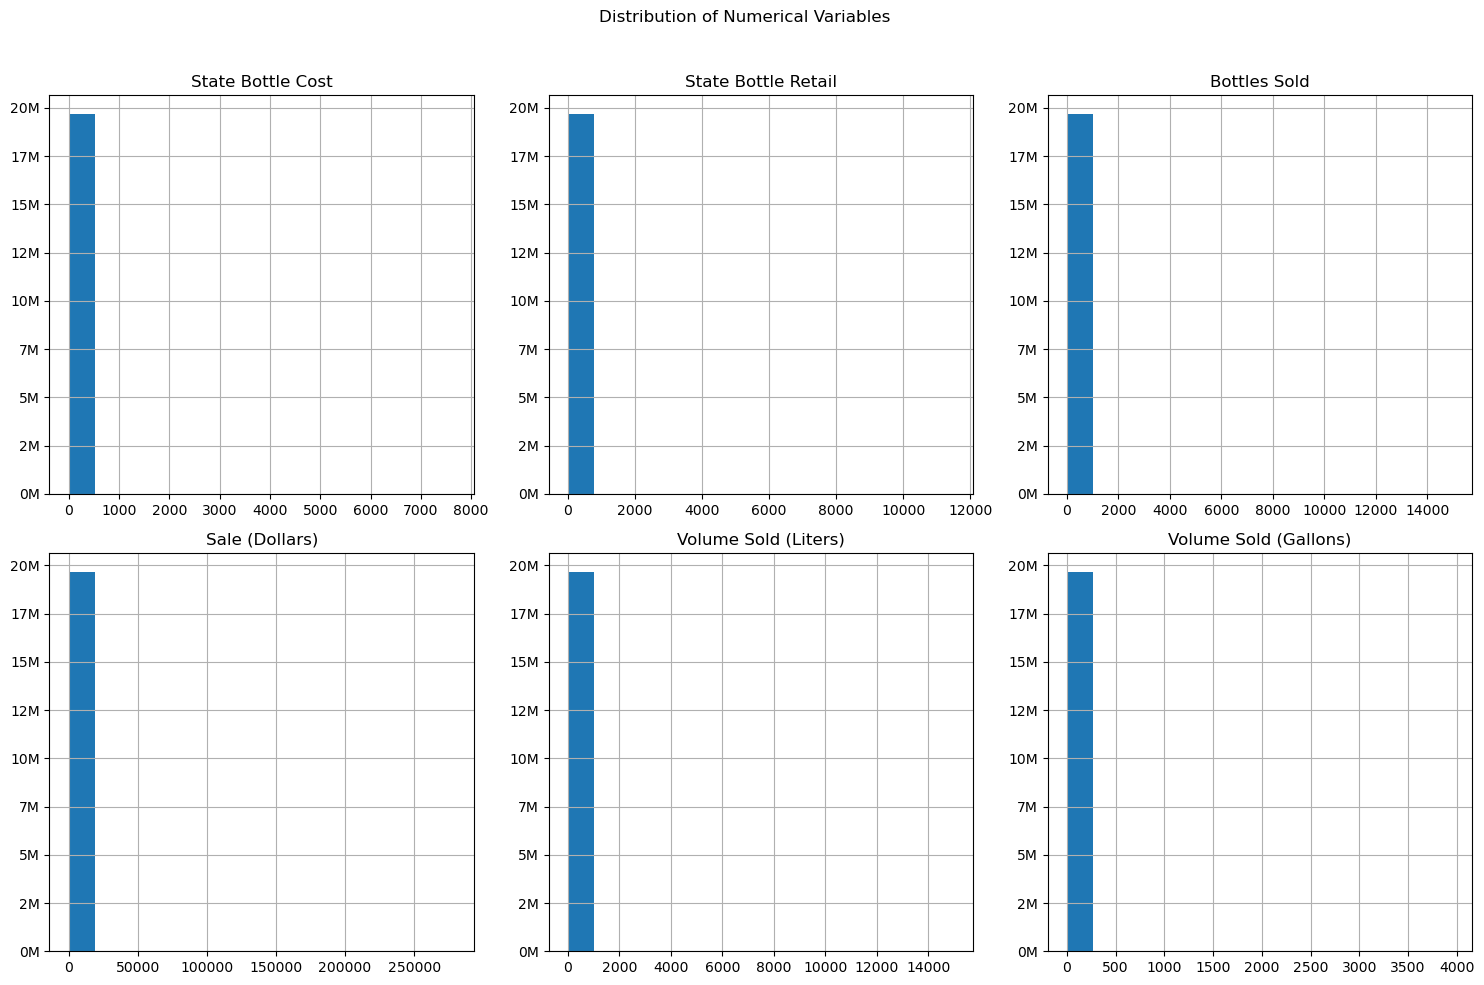

In [5]:
numerical_cols = ['State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']

df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(2, 3))

plt.suptitle('Distribution of Numerical Variables')

axes = plt.gcf().get_axes()

for ax in axes:

    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Distribution of Numerical Variables Through Box Plot

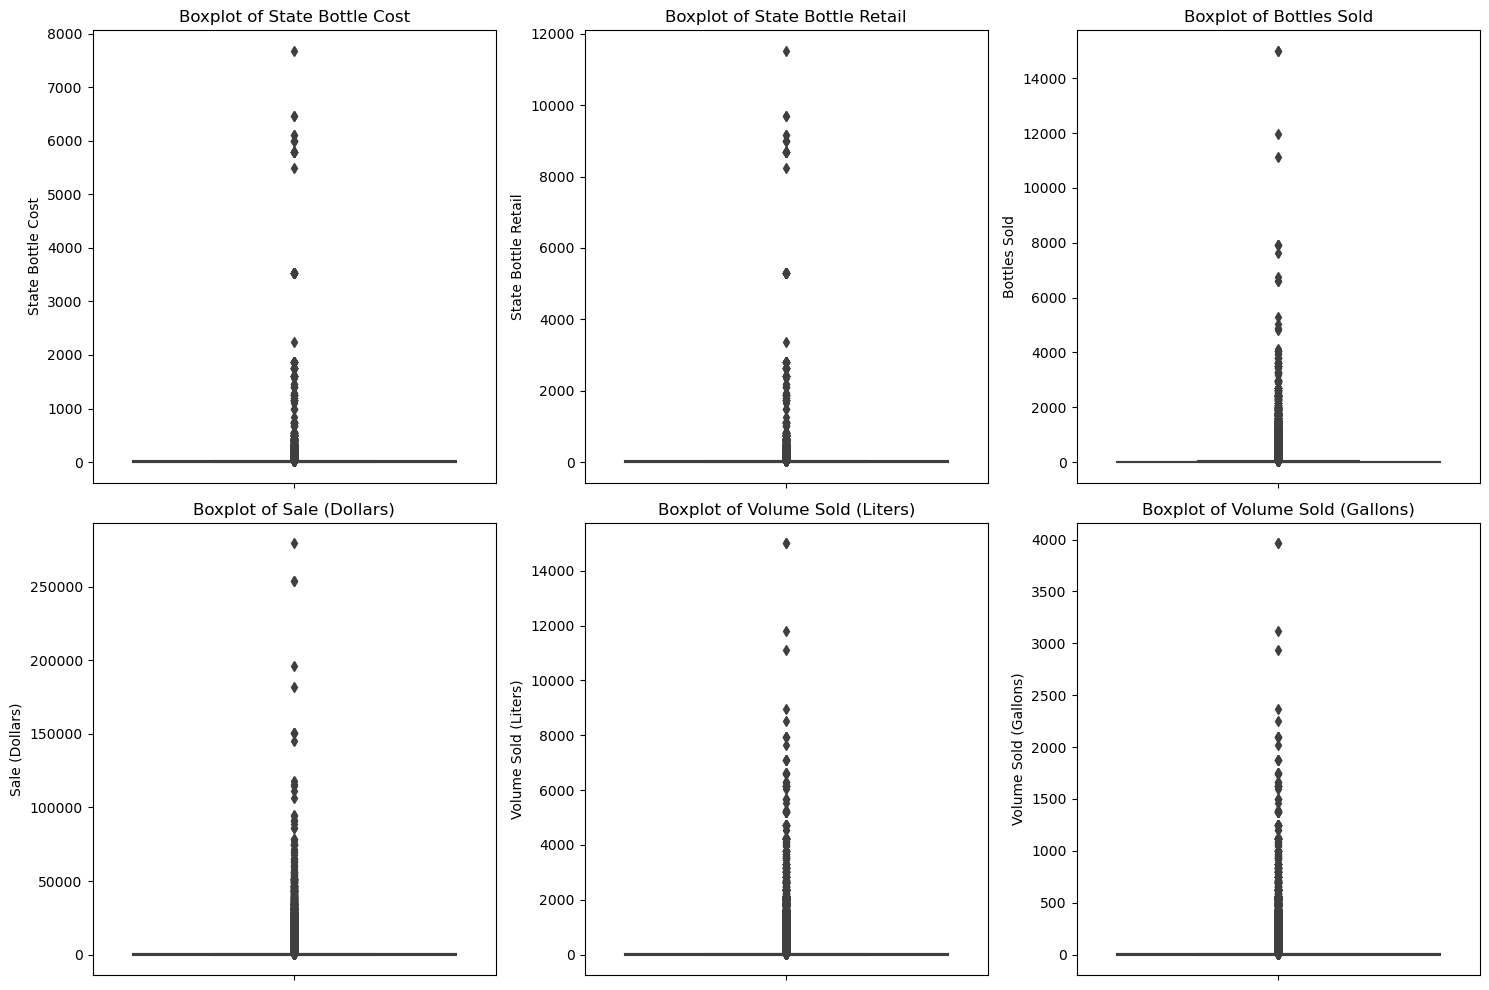

In [6]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Distribution of Numerical Variables Through Correlation Matrix

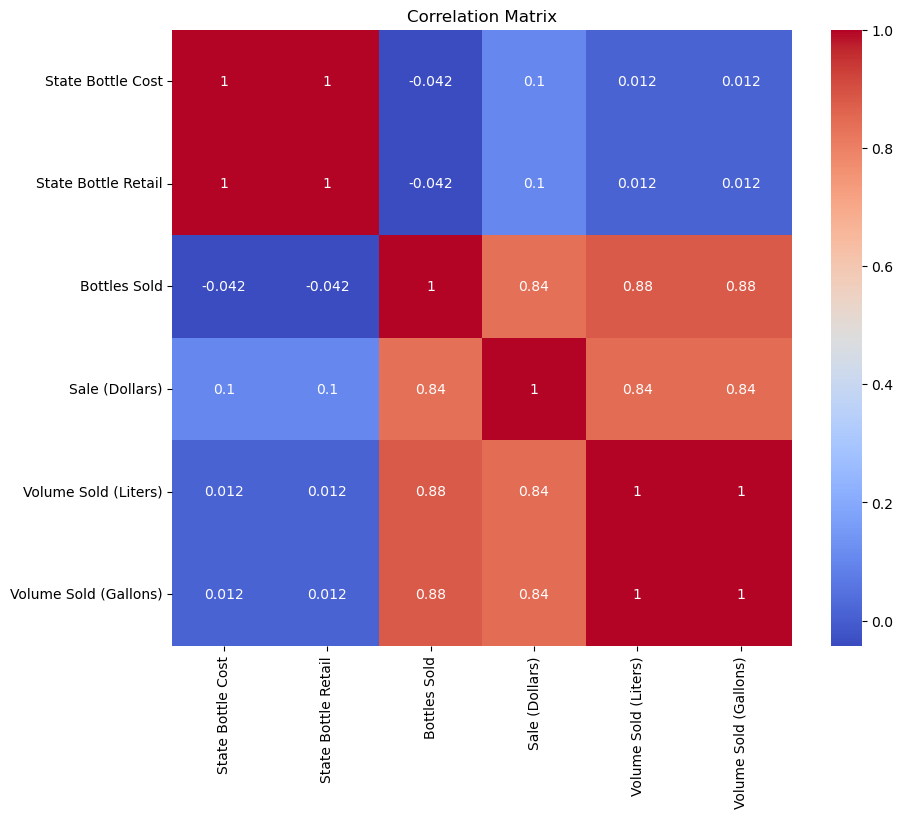

In [7]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Top 20 Most Frequent Categories by Store, City, Product, Vendor, and County

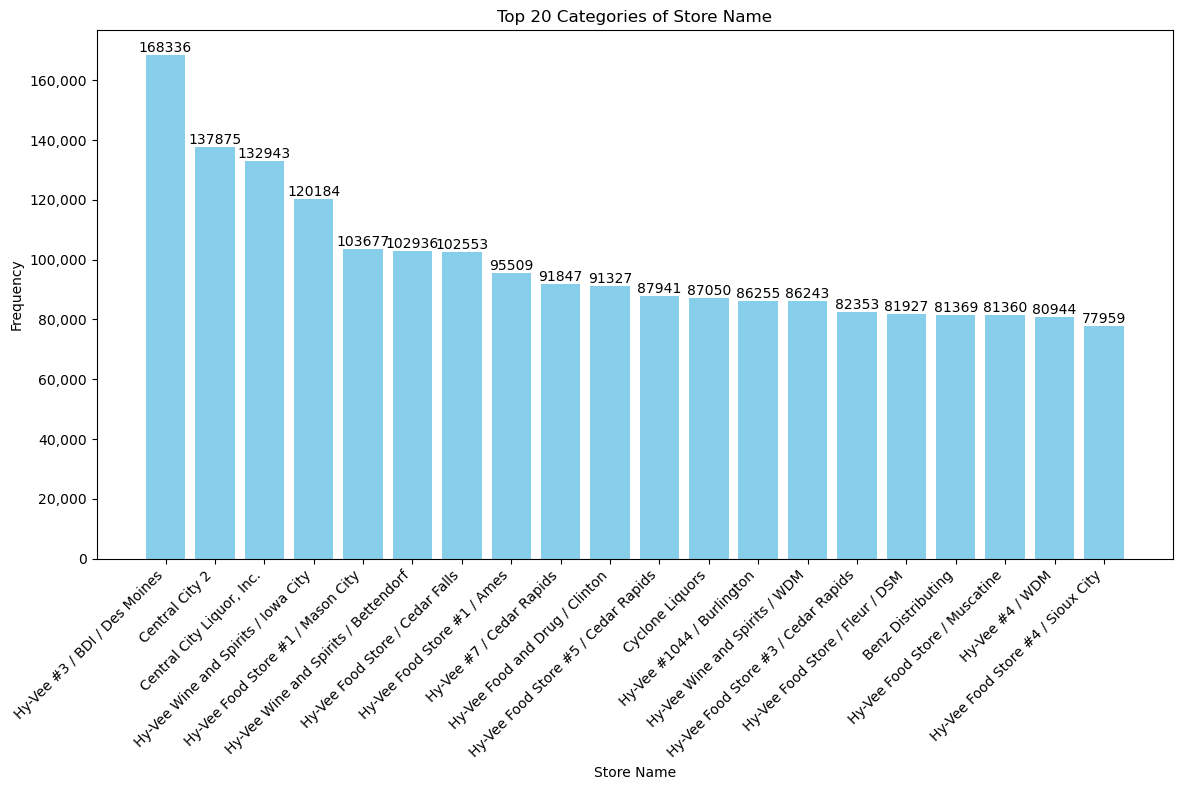

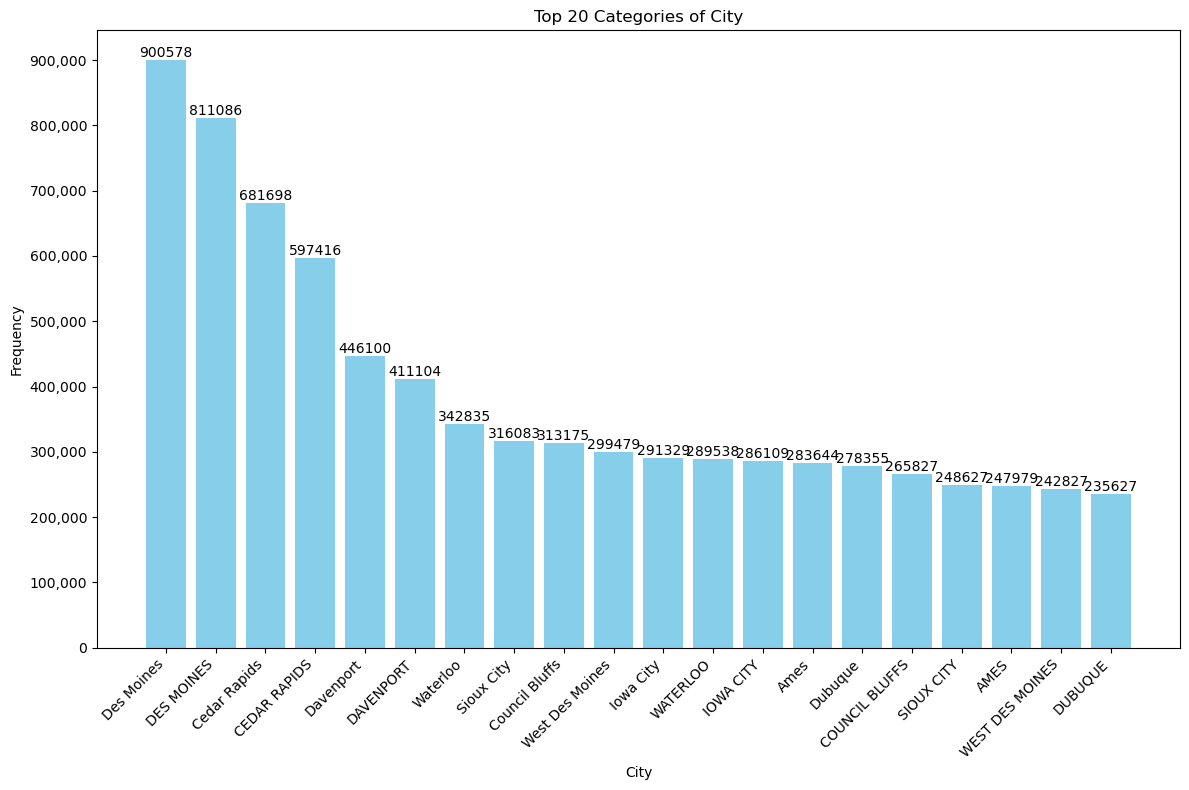

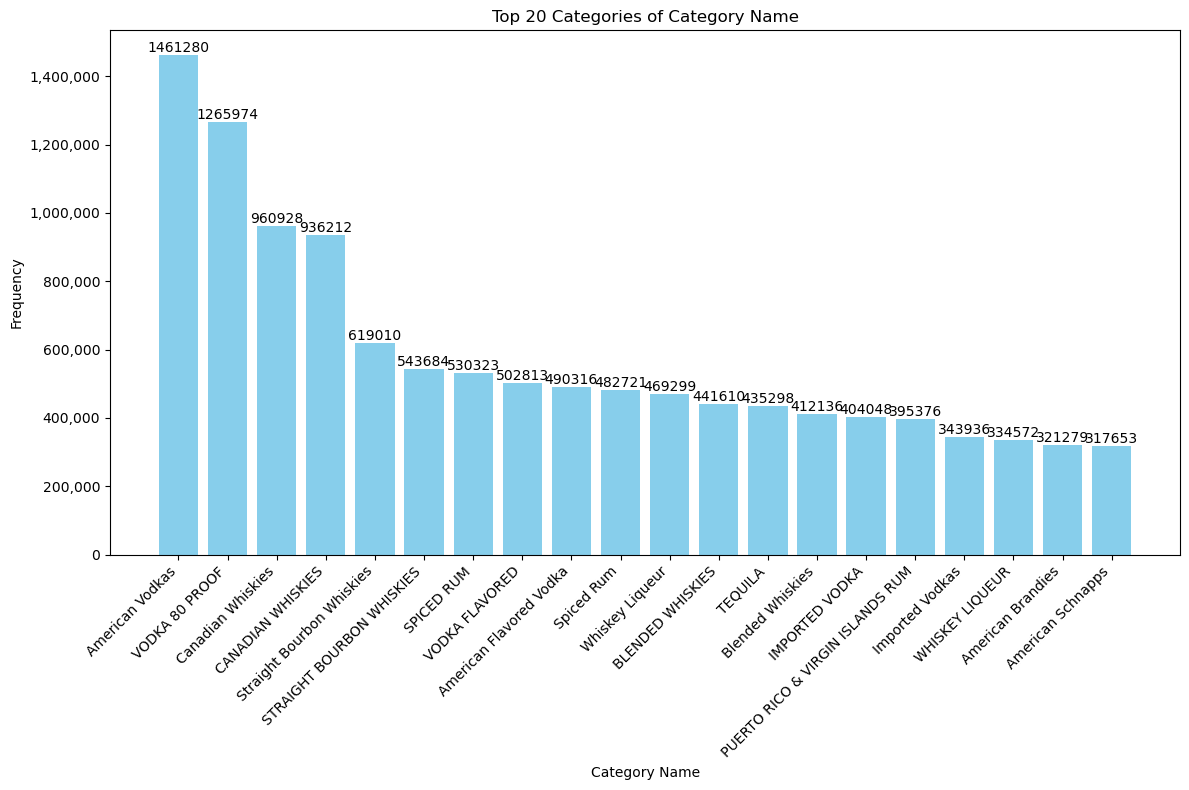

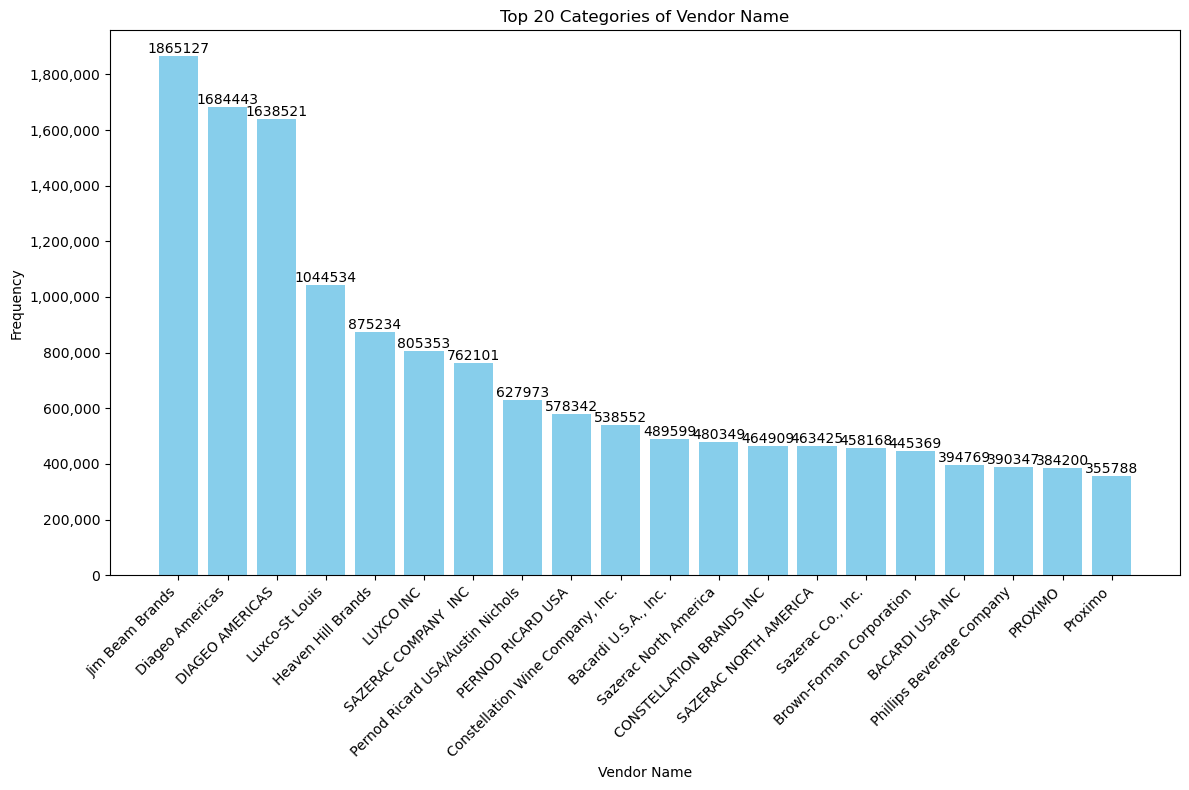

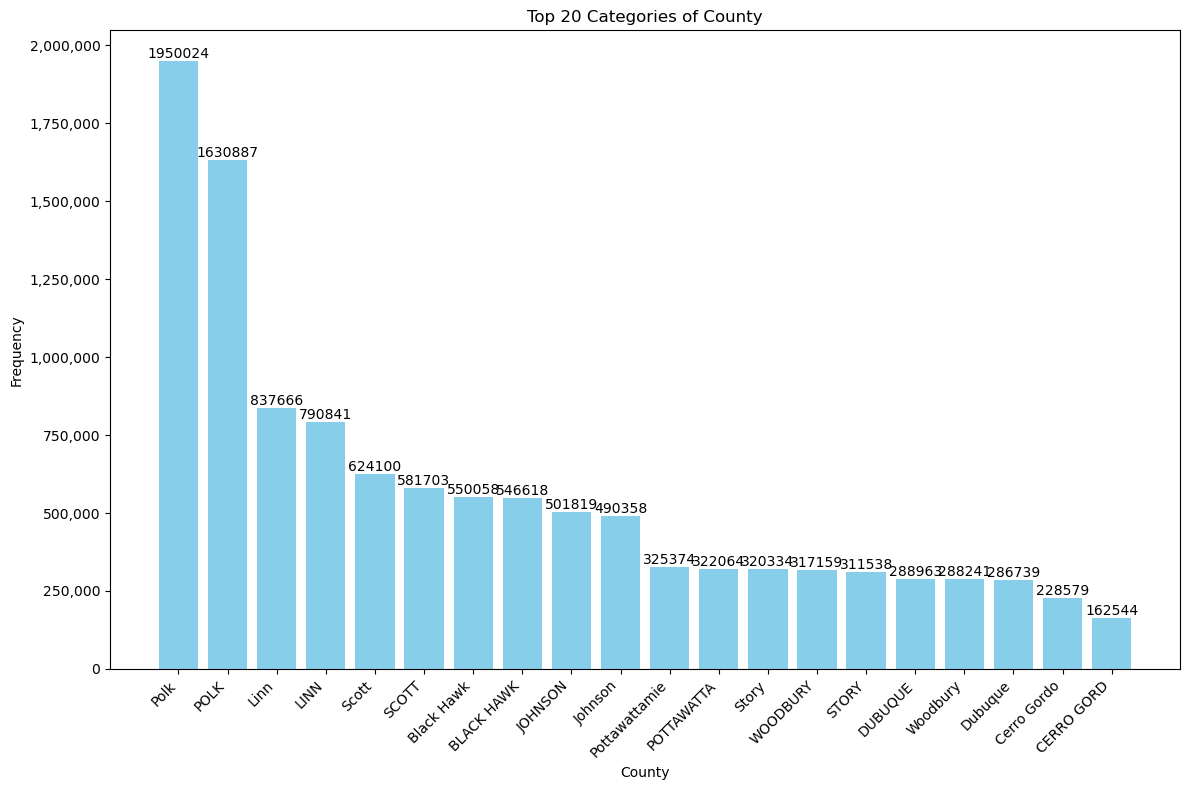

In [8]:
from matplotlib.ticker import MaxNLocator, FuncFormatter

def plot_top_categories(df, col, top_n=20):
    plt.figure(figsize=(12, 8))
    value_counts = df[col].value_counts().head(top_n)
    bars = plt.bar(value_counts.index, value_counts.values, color='skyblue')
    plt.title(f'Top {top_n} Categories of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.xticks(rotation=45, ha='right')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

    plt.tight_layout()
    plt.show()

categorical_cols = ['Store Name', 'City', 'Category Name', 'Vendor Name', 'County']

for col in categorical_cols:
    plot_top_categories(df, col)

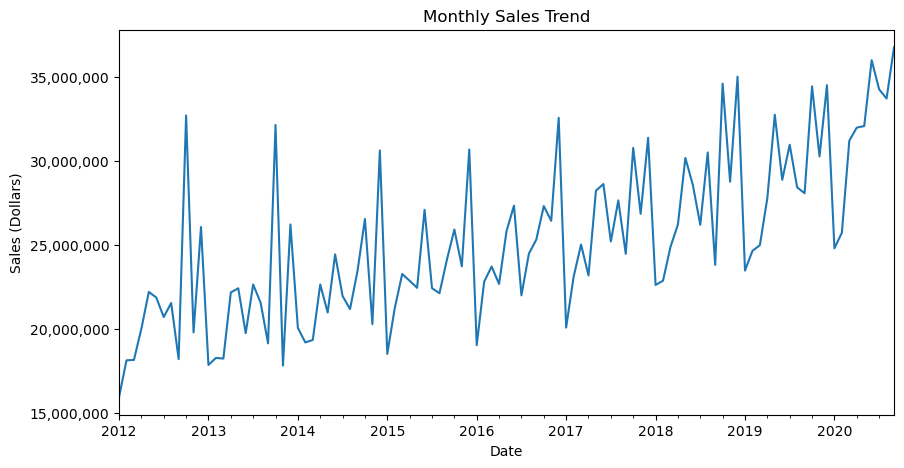

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Sale (Dollars)'].resample('M').sum().plot(figsize=(10, 5))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales (Dollars)')
plt.show()

## Top 20 Cities by Total Sales in Dollars

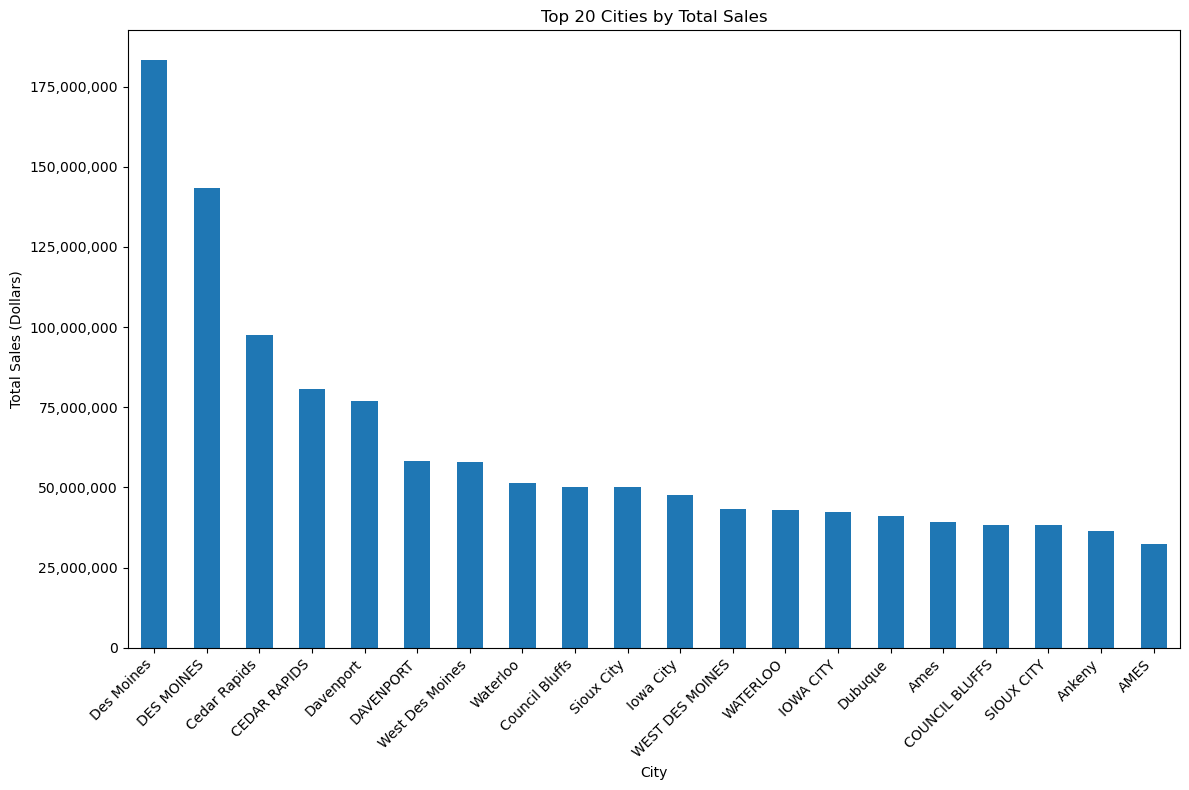

In [10]:
city_sales = df.groupby('City')['Sale (Dollars)'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
ax = city_sales.plot(kind='bar')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(rotation=45, ha='right')

plt.title('Top 20 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales (Dollars)')

plt.tight_layout() 
plt.show()

## Top 20 Products by Total Sales in Dollars

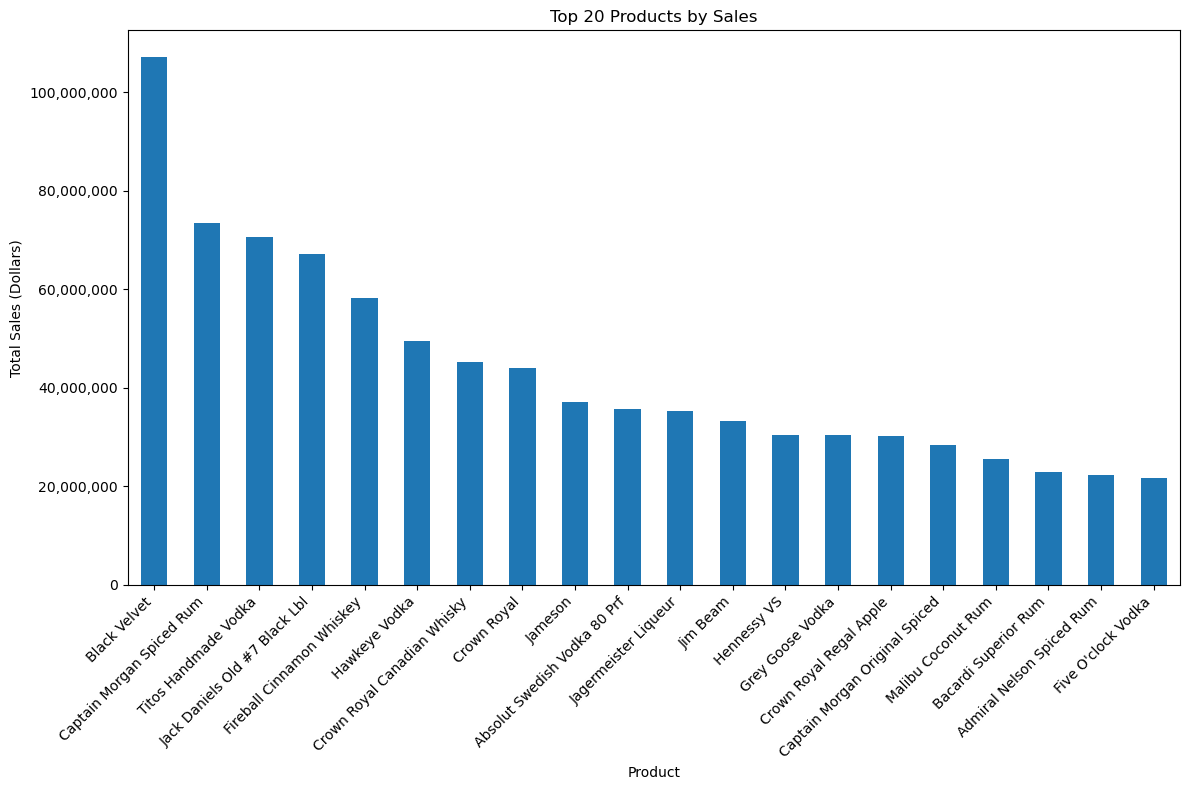

In [11]:
top_products = df.groupby('Item Description')['Sale (Dollars)'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
ax = top_products.plot(kind='bar')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(rotation=45, ha='right')

plt.title('Top 20 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales (Dollars)')

plt.tight_layout()  
plt.show()

In [12]:
df = df.dropna()
df.isnull().sum()

Invoice/Item Number      0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location           0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [13]:
df.head()

,Invoice/Item Number,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-19,S24127700024,3678,"Smoke Shop, The",1918 SE 14TH ST,DES MOINES,50320,POINT (-93.597011 41.570844),77.0,Polk,1031200.0,...,41783,Uv Blue Raspberry Vodka Mini,6,500,4.89,7.34,2,14.68,1.0,0.26
2013-10-10,S15066200002,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77.0,Polk,1082900.0,...,904969,Sabe Premiom Sake Double Barrel,6,750,14.99,22.49,6,134.94,4.5,1.19
2014-06-03,S19323500030,2607,Hy-Vee Wine and Spirits / Shenandoah,520 SO FREMONT,SHENANDOAH,51601,POINT (-95.385111 40.761736),73.0,Page,1062200.0,...,45277,Paramount White Rum,12,1000,4.34,6.51,12,78.12,12.0,3.17
2015-01-06,S23334500013,4810,Kum & Go #518 / Ankeny,3603 NE OTTERVIEW CIRCLE,ANKENY,50021,POINT (-93.572458 41.760989),77.0,Polk,1062200.0,...,43121,Bacardi Superior Rum Mini,12,500,5.54,8.31,1,8.31,0.5,0.13
2012-12-27,S09742200010,4025,Karam Kaur Khasriya Llc,702 13TH ST,BELLE PLAINE,52208,POINT (-92.277759 41.897052),6.0,Benton,1012100.0,...,11298,Crown Royal Canadian Whisky,6,1750,31.00,46.49,2,92.98,3.5,0.92


## Predictive Modelling Using Deep Neural Network

In [14]:
selected_features = [
    'Store Number',
    'County Number',
    'Category',
    'Vendor Number',
    'Pack',
    'Bottle Volume (ml)',
    'State Bottle Cost',
    'State Bottle Retail',
    'Bottles Sold',
    'Volume Sold (Liters)'
]

X = df[selected_features]
y = df['Sale (Dollars)'] 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=20)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [16]:
model = Sequential()

model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))  # Increased Dropout
model.add(BatchNormalization())

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,              
    batch_size=2048,         
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")

y_pred = model.predict(X_test)

mae_score = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) on test data: {mae_score}")
print(f"R-squared (R2) on test data: {r2}")

Epoch 1/100
5528/5528 [==============================] - 248s 44ms/step - loss: 113904.8672 - mae: 61.1468 - val_loss: 39823.2578 - val_mae: 27.1777 - lr: 0.0010
Epoch 2/100
5528/5528 [==============================] - 225s 41ms/step - loss: 53557.9414 - mae: 39.5570 - val_loss: 32254.7344 - val_mae: 23.2444 - lr: 0.0010
Epoch 3/100
5528/5528 [==============================] - 199s 36ms/step - loss: 45662.1641 - mae: 36.1652 - val_loss: 22106.2480 - val_mae: 24.8386 - lr: 0.0010
Epoch 4/100
5528/5528 [==============================] - 202s 37ms/step - loss: 43253.0078 - mae: 34.9276 - val_loss: 18027.0977 - val_mae: 22.5419 - lr: 0.0010
Epoch 5/100
5528/5528 [==============================] - 197s 36ms/step - loss: 41163.2930 - mae: 35.2446 - val_loss: 539422.3750 - val_mae: 20.8471 - lr: 0.0010
Epoch 6/100
5528/5528 [==============================] - 197s 36ms/step - loss: 40181.4961 - mae: 34.8425 - val_loss: 196953.4062 - val_mae: 19.5397 - lr: 0.0010
Epoch 7/100
5528/5528 [========

## Model Loss and Mean Absolute Error (MAE) for Training and Validation over Epochs

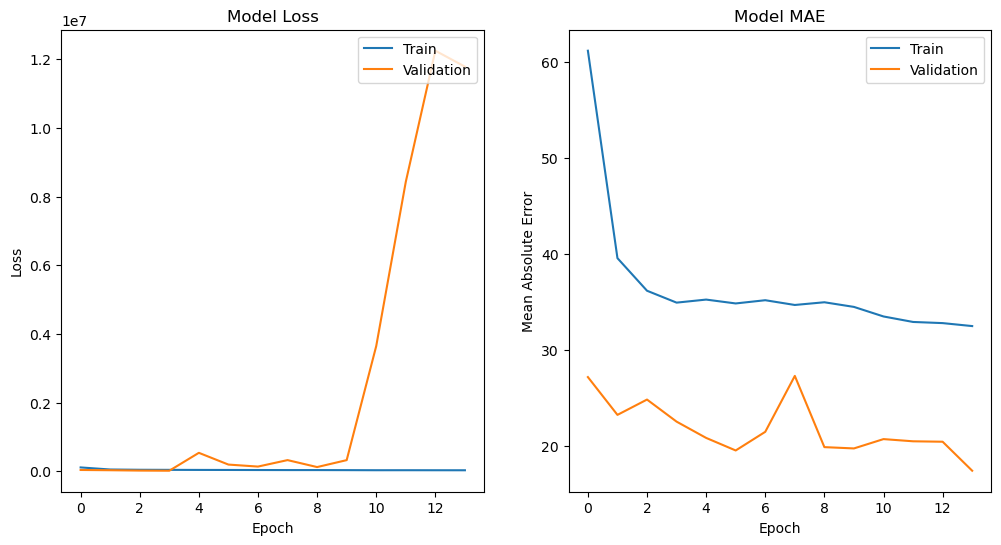

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()
